Import Libraries

In [27]:
import numpy as np
import pandas as pd

Reading the Dataset

In [28]:
c = 'C:\\Users\\abhis\\Desktop\\Exercise\\day (2).csv'
cf = pd.read_csv(c , sep=',')

Showing Dataset

In [29]:
cf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Showing the Datatypes of All Columns

In [30]:
cf.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Droping Null Values

In [31]:
cf.dropna(axis=1 , inplace=True)
cf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Showing All Columns

In [32]:
print(cf.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Checking the NaN values in Every Columns

In [33]:
cf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Implementing RandomForest For Feature Selection 

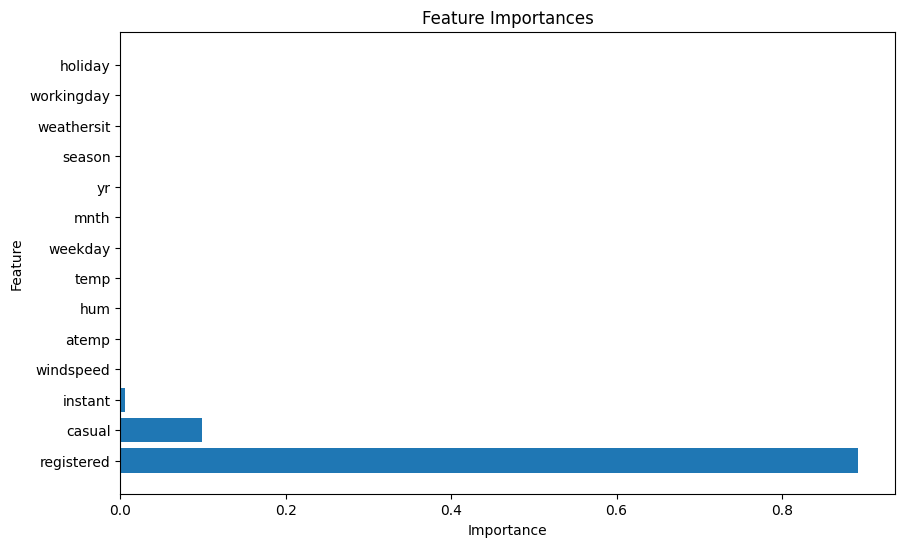

Feature Importance Ranking:
       Feature  Importance
13  registered    0.892269
12      casual    0.098573
0      instant    0.005349
11   windspeed    0.000775
9        atemp    0.000760
10         hum    0.000591
8         temp    0.000506
5      weekday    0.000373
3         mnth    0.000249
2           yr    0.000216
1       season    0.000154
7   weathersit    0.000075
6   workingday    0.000074
4      holiday    0.000035


In [34]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

target = 'cnt'
features = [col for col in cf.columns if col != target and col != 'dteday']

X = cf[features]
y = cf[target]

model = RandomForestRegressor()

model.fit(X, y)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame(
    {'Feature': features, 'Importance': feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

print("Feature Importance Ranking:")
print(feature_importance_df)


Implementing LinearRegression on cnt column

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = cf.drop(['cnt', 'dteday'], axis=1)
y = cf['cnt'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.436127082026362e-25
R-squared: 1.0
